![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [161]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

#Load the CSV file and store as netflix_df
netflix_df = pd.read_csv('netflix_data.csv')

#Filter the data to remove TV shows and store as netflix_subset
netflix_subset = netflix_df[netflix_df['type'] == 'Movie']

#Investigate and subset the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]

#Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors

short_movies = netflix_movies[netflix_movies.duration < 60]
short_movies.head()

print(short_movies['genre'].value_counts().nlargest(5))
print(netflix_movies['genre'].value_counts().nlargest(5))

Documentaries    151
Children         107
Stand-Up          72
Uncategorized     40
Comedies          15
Name: genre, dtype: int64
Dramas           1384
Comedies         1074
Documentaries     751
Action            721
Children          502
Name: genre, dtype: int64


If movies are in fact getting shorter, a possible contributing factor is the different nature of their individual genre: international TV and crime TV rank as the two top genres if we sort by short movies, while Dramas and Comedies rank the top 2 for all types of movies. Perhaps throughout time different genres have emerged, which are shorter in duration?

In [162]:
#Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of yor choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list.

colors = []

for label, row in netflix_movies.iterrows():

    if row['genre'] == 'Children':
        colors.append('blue')
    elif row['genre'] == 'Documentaries':
        colors.append('black')
    elif row['genre'] == 'Stand-Up':
        colors.append('yellow')
    else:
        colors.append('green')

Text(0.5, 1.0, 'Movie Duration by Year of Release')

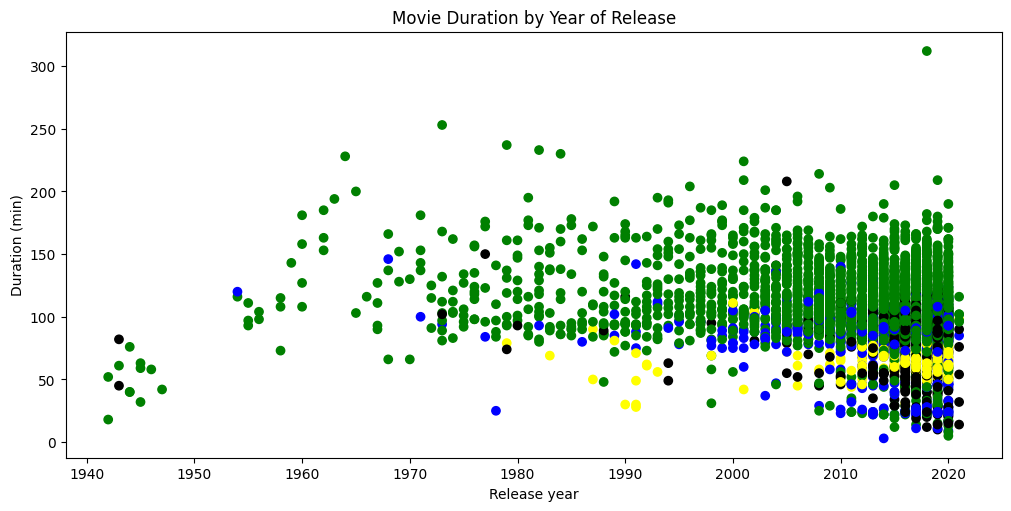

In [163]:
#Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release"

fig = plt.figure(figsize=(10, 5), layout='constrained')
plt.scatter(netflix_movies.release_year, netflix_movies.duration, c=colors)

plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title("Movie Duration by Year of Release")

In [164]:
#After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes" or "no" to the variable answer

answer = 'no'